# 타이타닉 데이터 분석

## 1.EDA

In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#null checking
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

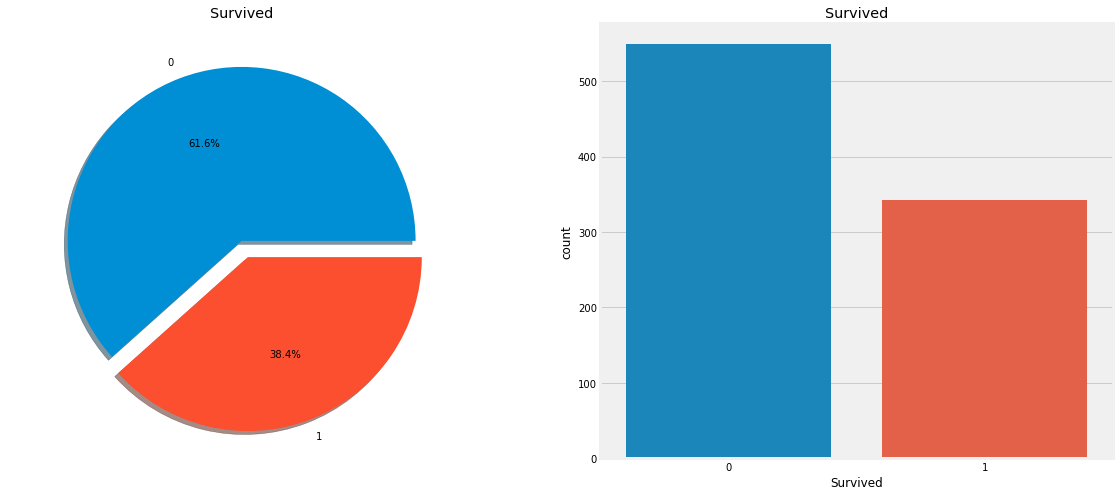

In [4]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot(kind='pie', explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 1.1 Sex -> Categorical Feature

In [5]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [6]:
pd.crosstab(data['Sex'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


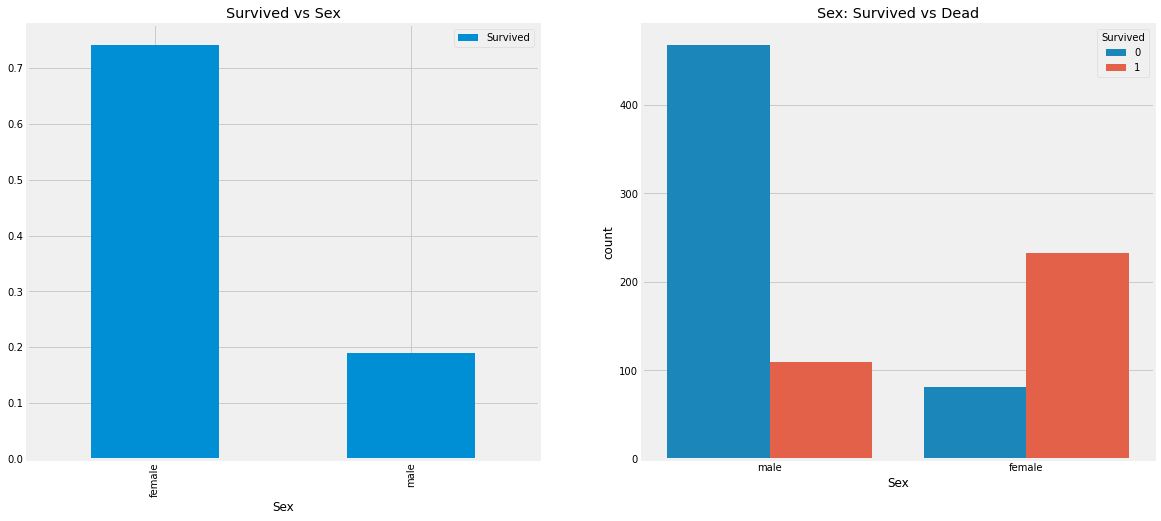

In [7]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind='bar', ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

### 1.2 Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


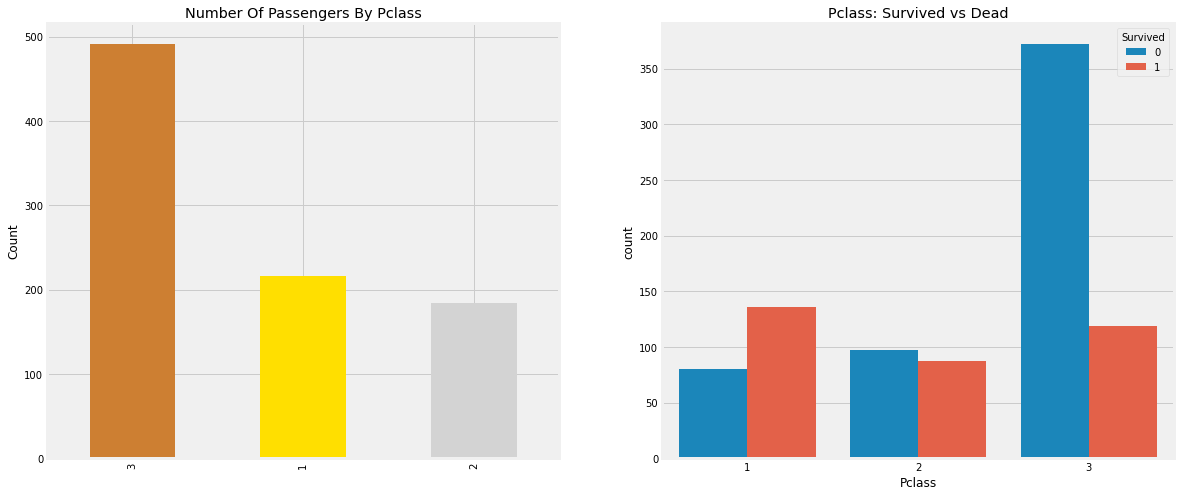

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

data['Pclass'].value_counts().plot(kind='bar', color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

In [10]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

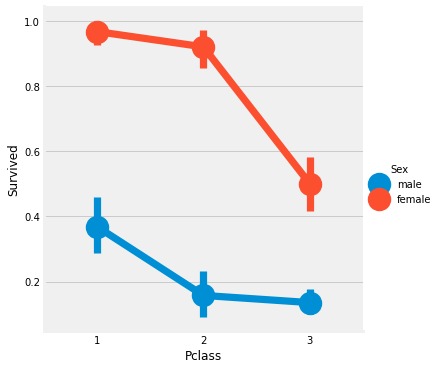

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

### 1.3 Age -> Continous Feature

In [12]:
print('Oldest Passenger was of :', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:', round(data['Age'].mean(),3), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.699 Years


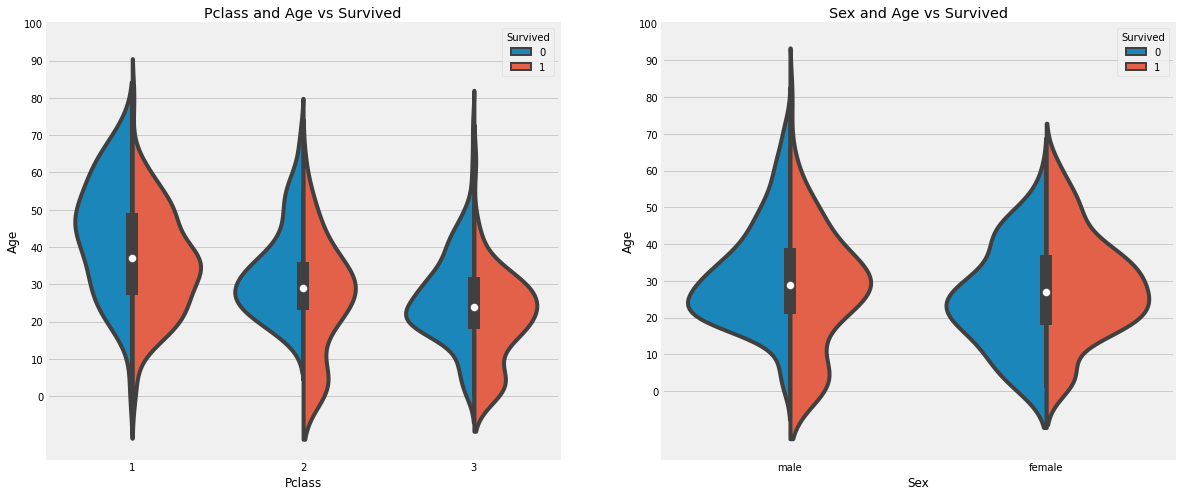

In [13]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot('Pclass','Age', hue='Survived', data = data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))


sns.violinplot('Sex','Age', hue='Survived', data= data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

In [14]:
data['Age'].isnull().sum()

177

In [15]:
data['Initial'] = 0
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [17]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [19]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
#Filling NaN Ages
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [21]:
data['Age'].isnull().sum()

0

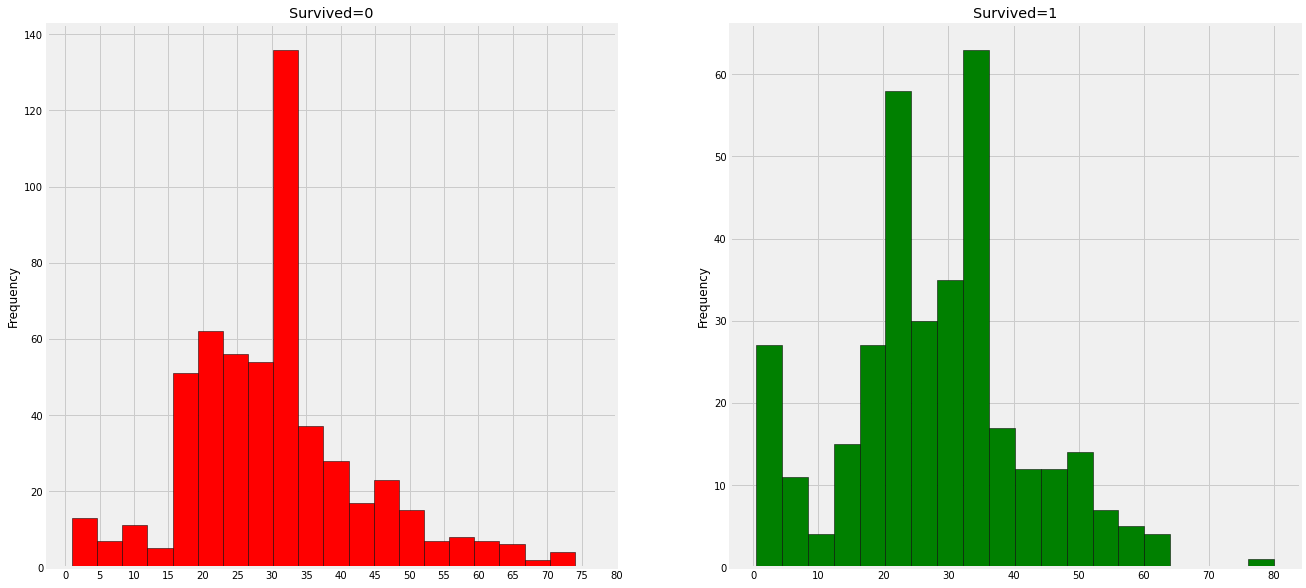

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

data[data['Survived'] == 0]['Age'].plot(kind='hist', ax=ax[0], bins=20,edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)


data[data['Survived'] == 1]['Age'].plot(kind='hist', ax=ax[1], color='green', bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[0].set_xticks(x2)

plt.show()

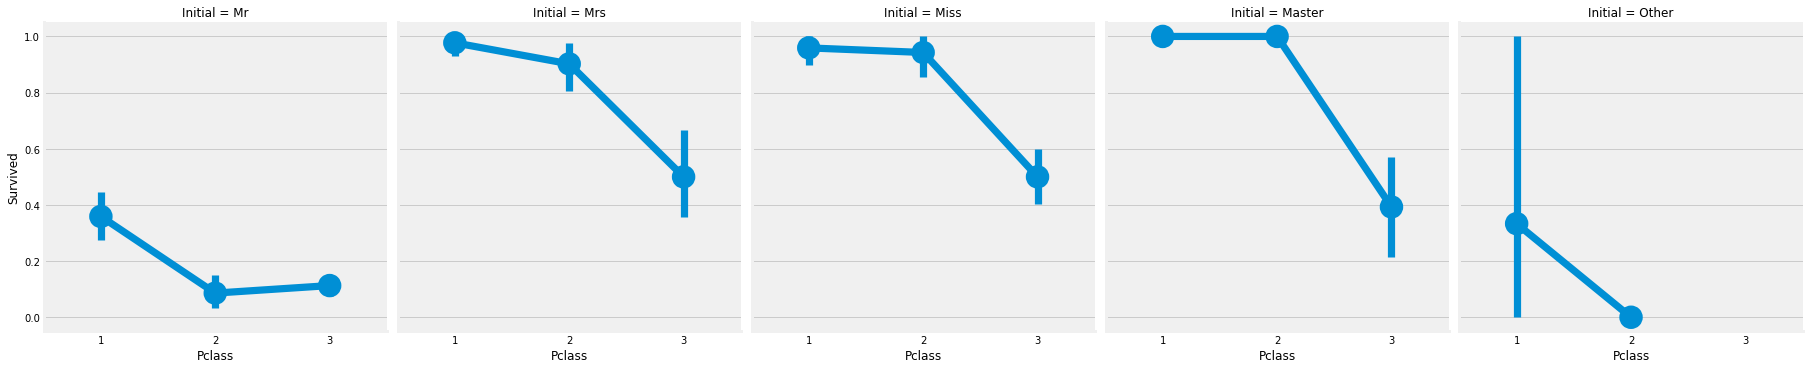

In [23]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

### 1.4 Embarked -> Categorical Value

In [24]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins=True).style.background_gradient(cmap='summer_r')

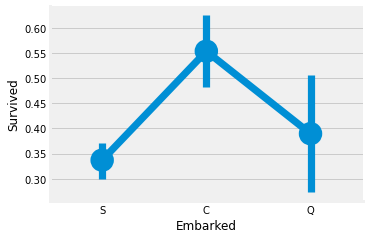

In [25]:
#chances for survival by Port of Embarkation

sns.factorplot('Embarked','Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

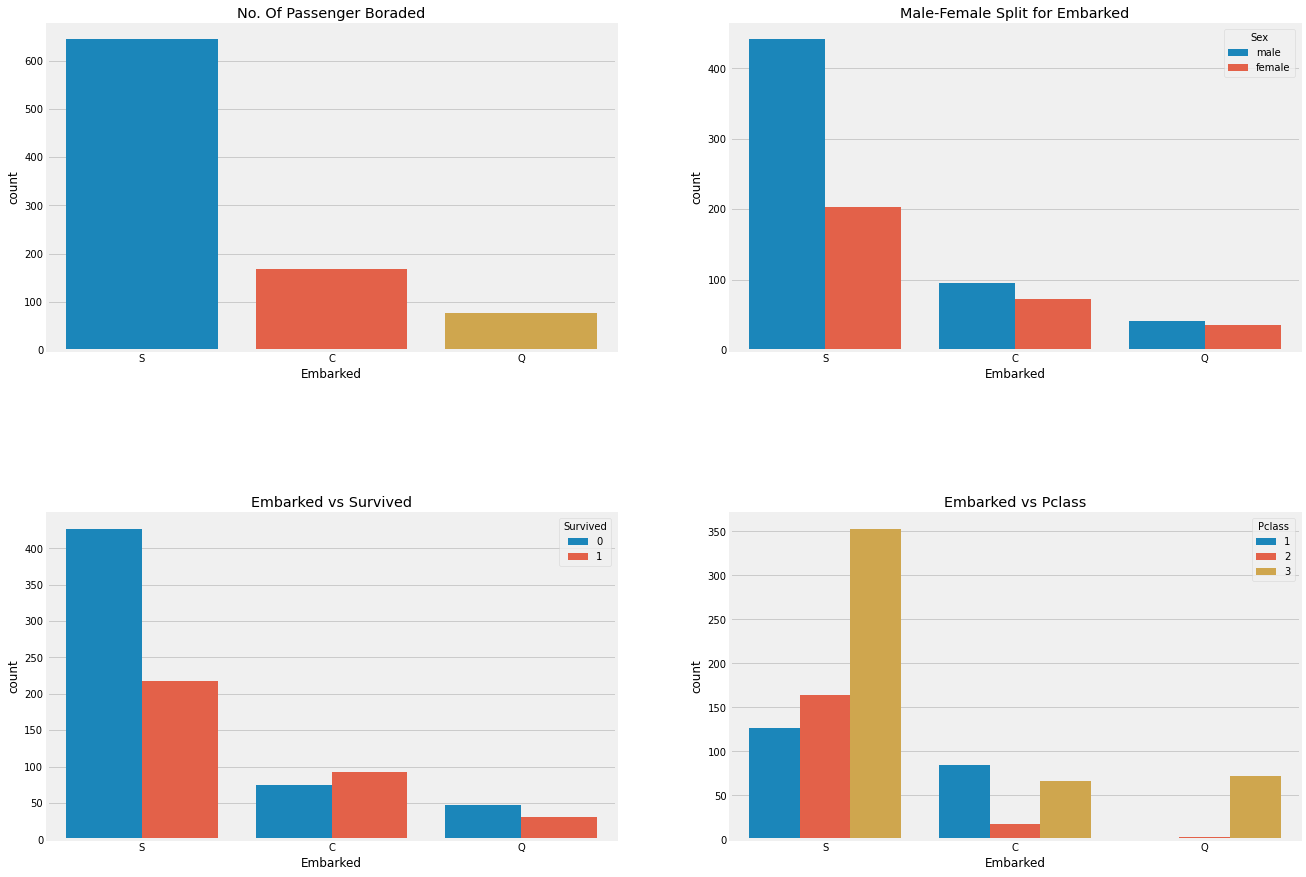

In [26]:
fig, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passenger Boraded')

sns.countplot('Embarked', hue='Sex',data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

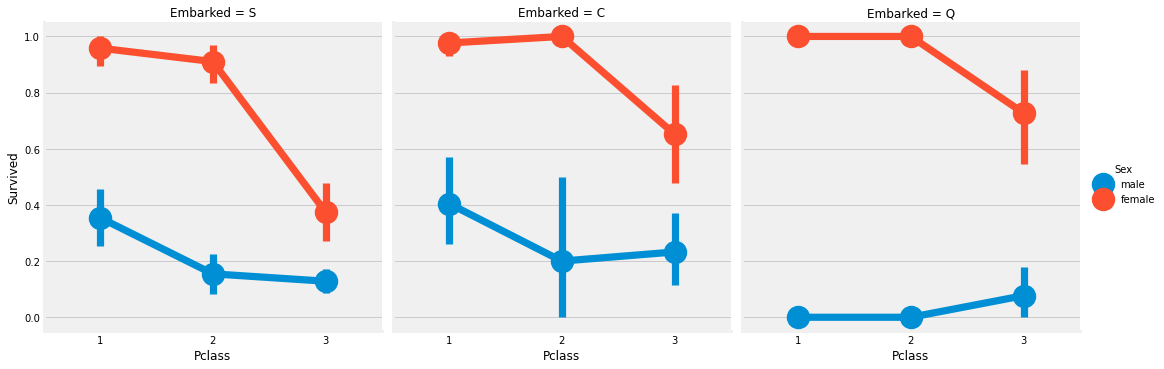

In [27]:
sns.factorplot('Pclass','Survived',hue='Sex', col='Embarked', data=data)
plt.show()

In [28]:
data['Embarked'].fillna('S', inplace=True)
data['Embarked'].isnull().sum()

0

### 1.5 SibSp  ->Discrete Feature

In [29]:
pd.crosstab(data['SibSp'], data['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


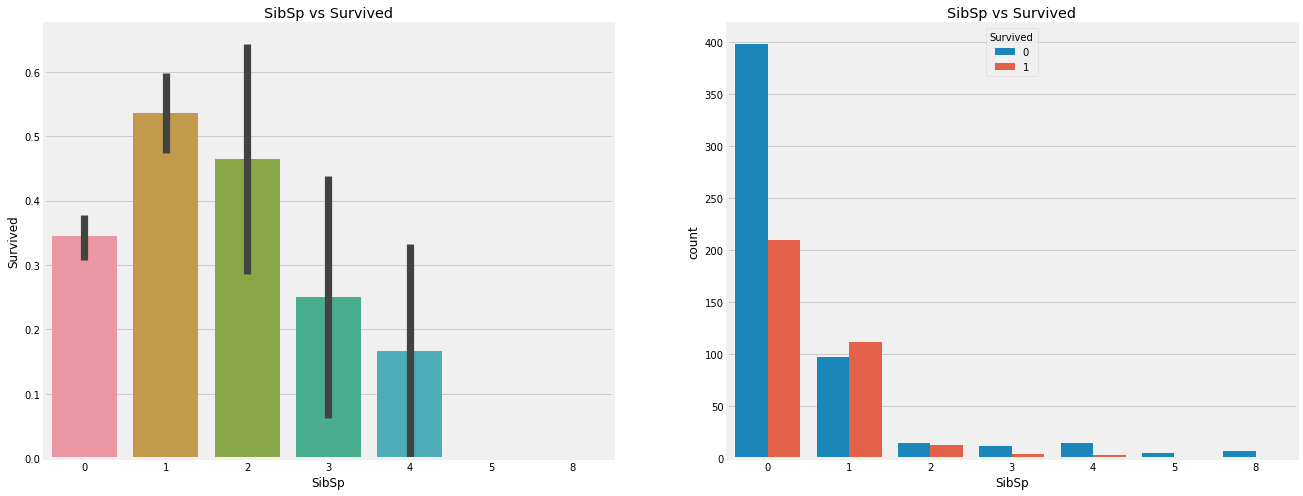

In [30]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.countplot('SibSp',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [31]:
pd.crosstab(data['SibSp'], data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


### 1.6 Parch

In [32]:
pd.crosstab(data['Parch'],data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


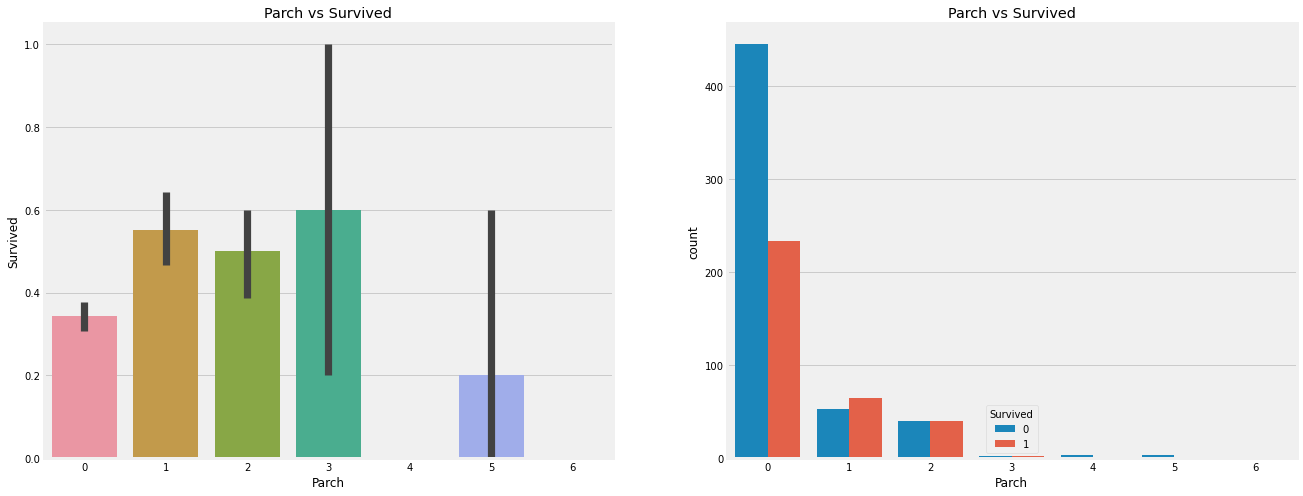

In [33]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.countplot('Parch', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

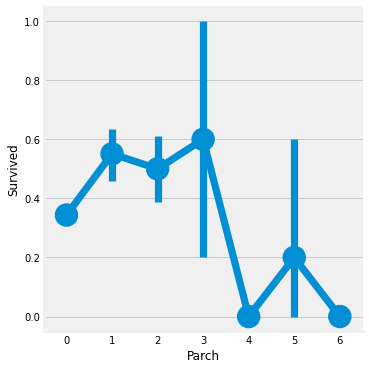

In [34]:
sns.factorplot('Parch', 'Survived', data= data)
plt.show()

### 1.7 Fare -> COntinous Feature

In [35]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


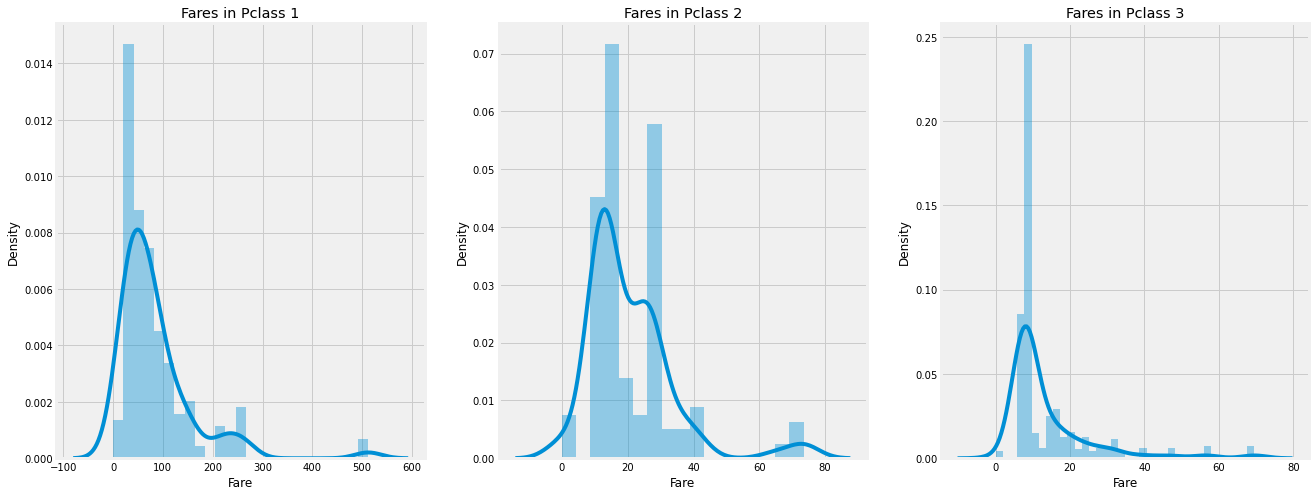

In [36]:
fig, ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1]['Fare'], ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2]['Fare'], ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

In [37]:
print('Average 1 class Fare:',data[data['Pclass']==1]['Fare'].mean())
print('Average 2 class Fare:',data[data['Pclass']==2]['Fare'].mean())
print('Average 3 class Fare:',data[data['Pclass']==3]['Fare'].mean())

Average 1 class Fare: 84.1546875
Average 2 class Fare: 20.662183152173913
Average 3 class Fare: 13.675550101832993


### 1.8 Correlation Between The Features

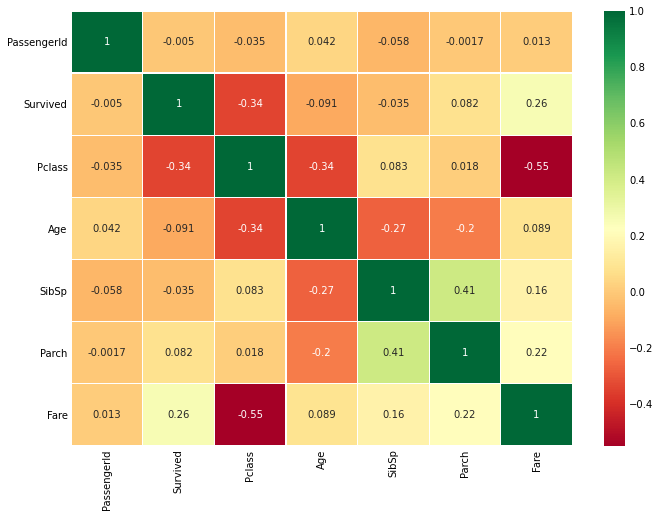

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig = plt.gcf()

fig.set_size_inches(10,8)
plt.show()

## 2. Feature Engineering and Data Cleaning

### 2.1 Age_band

In [39]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <=32),'Age_band'] =1
data.loc[(data['Age'] > 32) & (data['Age'] <=48),'Age_band'] =2
data.loc[(data['Age'] > 48) & (data['Age'] <=64),'Age_band'] =3
data.loc[data['Age'] > 64 ,'Age_band'] =4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


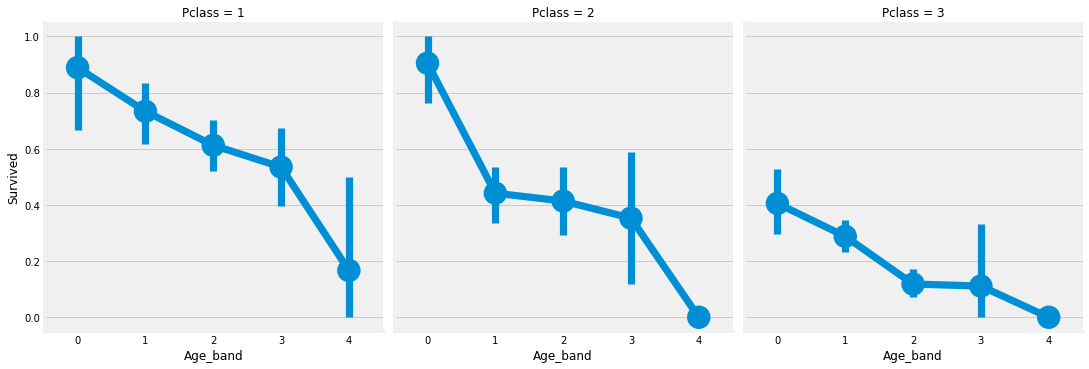

In [41]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

In [42]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size'] == 0,'Alone'] = 1

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,0,1


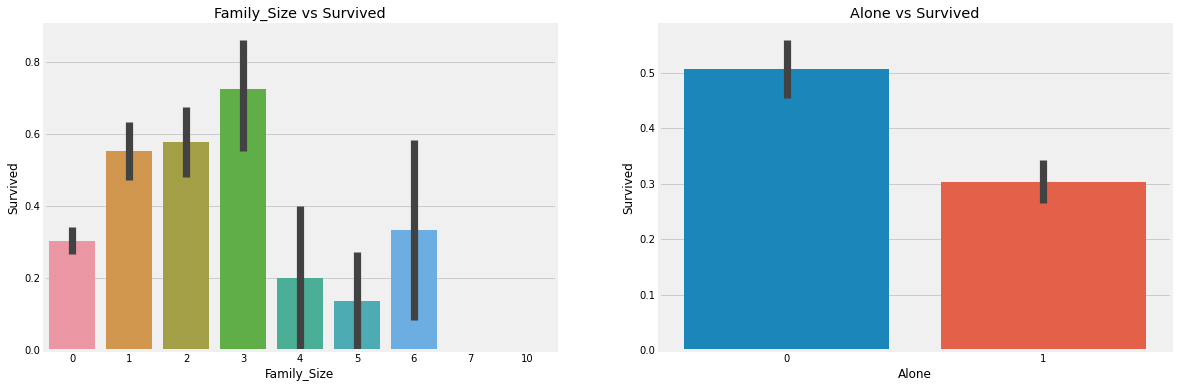

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.barplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.barplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

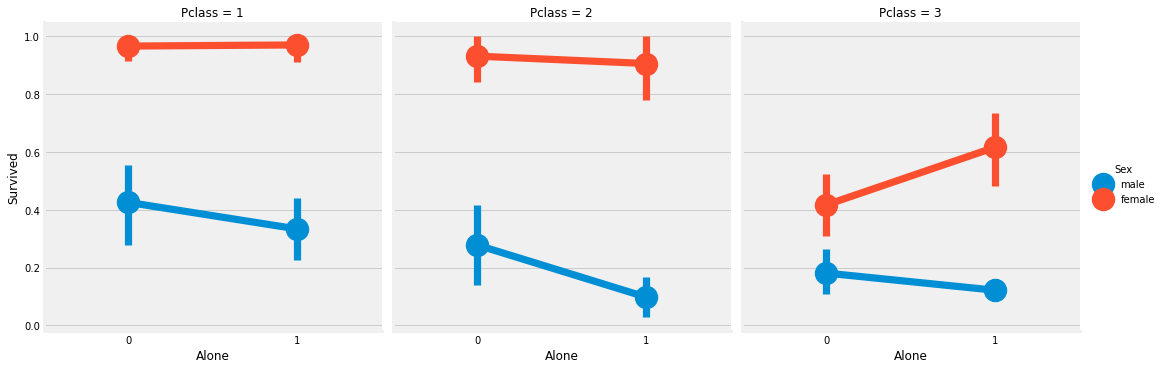

In [44]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

### 2.2 Fare_Range

In [45]:
data['Fare_Range'] = pd.qcut(data['Fare'] , 4)
data['Fare_Range']

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare_Range, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [46]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [47]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <=31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <=513), 'Fare_cat'] = 3

In [48]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1,0,1,"(7.91, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,0,1,"(14.454, 31.0]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,3,0,"(14.454, 31.0]",2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,0,1,"(14.454, 31.0]",2


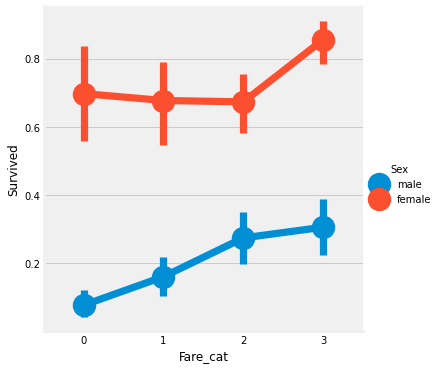

In [49]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [50]:
data['Sex'].replace(['male','female'],[0,1], inplace=True)
data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [51]:
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,4,1,0,1,"(7.91, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,2,1,0,1,"(14.454, 31.0]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,NaN,0,2,1,3,0,"(14.454, 31.0]",2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,1,0,1,"(14.454, 31.0]",2


In [52]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,4,1,0,1,1
887,1,1,1,0,0,0,2,1,0,1,2
888,0,3,1,1,2,0,2,1,3,0,2
889,1,1,0,0,0,1,0,1,0,1,2


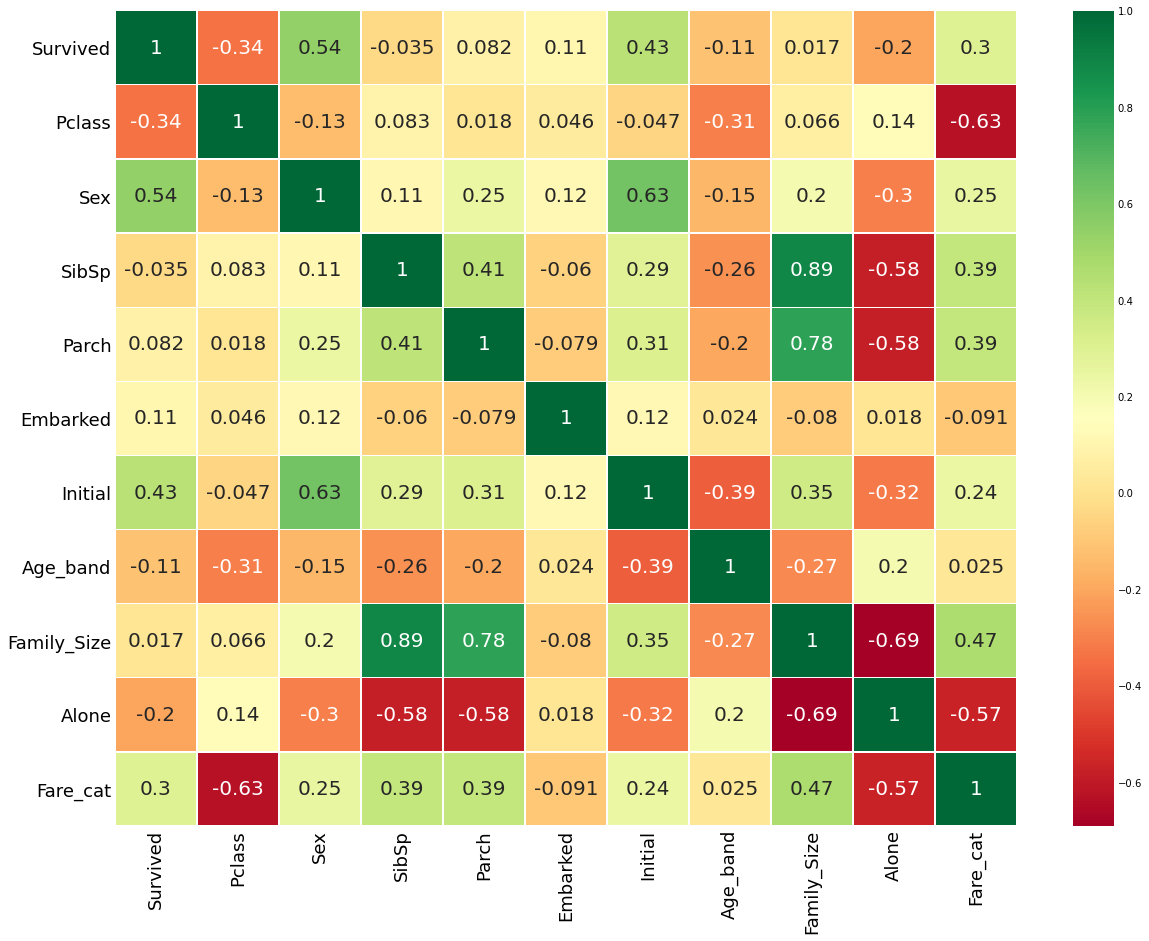

In [53]:
sns.heatmap(data.corr() ,annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## 3. Predictive Modeling

In [54]:
# import required packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [55]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
x_train = train[train.columns[1:]]
y_train = train[train.columns[:1]]
x_test = test[test.columns[1:]]
y_test = test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [56]:
print(x_train.shape, y_train.shape)

(623, 10) (623, 1)


### 3.1 SVM

#### rbf - SVM

In [57]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(x_train, y_train)

pred1 = model.predict(x_test)
print('Accuracy for rbf SVM is', metrics.accuracy_score(pred1,y_test))

Accuracy for rbf SVM is 0.835820895522388


#### linear -SVM

In [58]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(x_train, y_train)

pred2 = model.predict(x_test)
print('Accuracy for linear SVM is' , metrics.accuracy_score(pred2, y_test))

Accuracy for linear SVM is 0.8171641791044776


### 3.2 Logistic Regression

In [59]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred3 = model.predict(x_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(pred3, y_test))

The accuracy of the Logistic Regression is 0.8134328358208955


### 3.3 Decision Tree

In [60]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred4 = model.predict(x_test)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(pred4, y_test))

The accuracy of the Decision Tree is 0.8022388059701493


### 3.4 K-Nearest Neighbours(KNN)

In [61]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred5 = model.predict(x_test)
print('The accuracy of KNN is', metrics.accuracy_score(pred5, y_test))

The accuracy of KNN is 0.832089552238806


In [62]:
a_index = list(range(1,11))
a = pd.Series()
x = list(range(0,11))

In [63]:
for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))

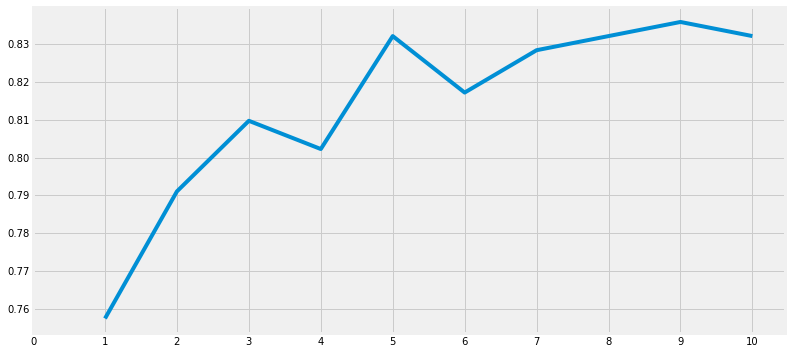

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [64]:
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

### 3.5 Gaussian Naive Bayes

In [65]:
model = GaussianNB()
model.fit(x_train, y_train)
pred6 = model.predict(x_test)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(pred6, y_test))

The accuracy of the NaiveBayes is 0.8134328358208955


### 3.6 Random Forests

In [66]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
pred7 = model.predict(x_test)
print('The accuracy of the Random Forests is', metrics.accuracy_score(pred7, y_test))

The accuracy of the Random Forests is 0.8134328358208955


## 4. Cross Validation

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [68]:
kfold = KFold(n_splits = 10, random_state =22)
xyz = []
accuracy =[]
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=10)]

In [69]:
for i in models:
    model = i
    cv_result = cross_val_score(model, X,Y, cv=kfold, scoring = 'accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models = pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers)
new_models

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.803645,0.030223
Naive Bayes,0.801386,0.028999
Random Forest,0.806954,0.034760


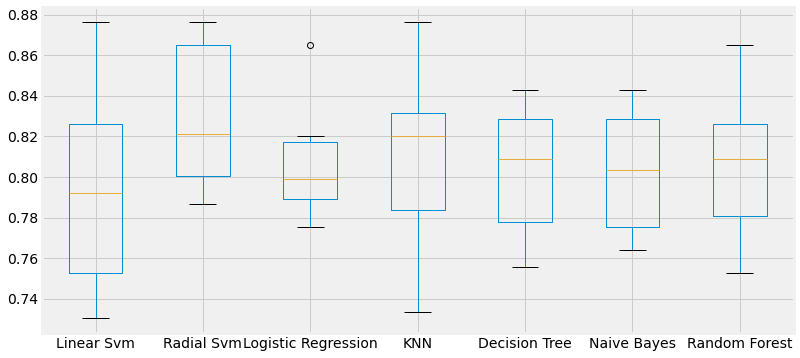

In [70]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

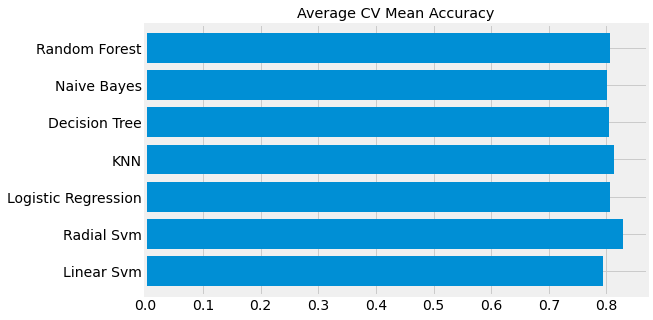

In [71]:
new_models['CV Mean'].plot(kind='barh', width=0.8)
plt.title('Average CV Mean Accuracy')
fig= plt.gcf()
fig.set_size_inches(8,5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

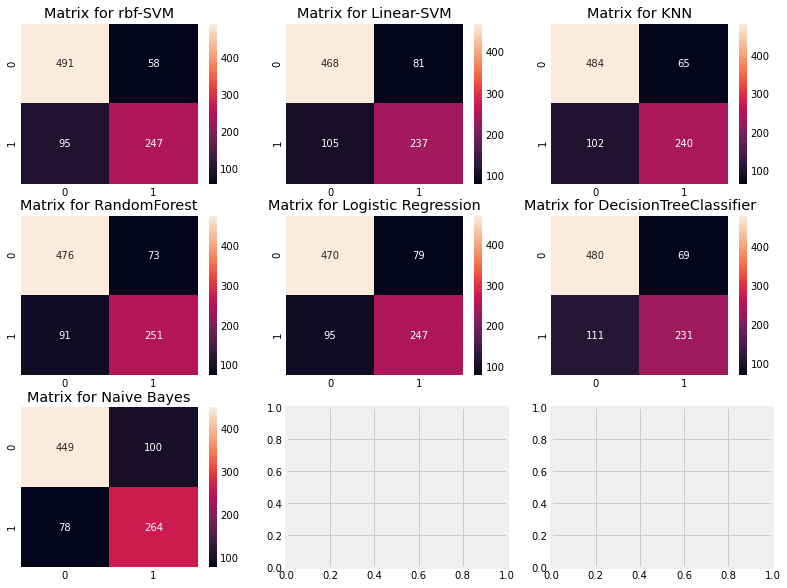

In [72]:
fig, ax = plt.subplots(3,3, figsize=(12,10))


y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for RandomForest')

y_pred = cross_val_predict(LogisticRegression(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for DecisionTreeClassifier')

y_pred = cross_val_predict(GaussianNB(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

## 5. Hyper Parameters Tuning

### 5.1 SVM

In [73]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel =['rbf','linear']
hyper ={'kernel':kernel, 'C':C, 'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid = hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   17.3s finished


### 5.2 Random Forests

In [74]:
n_estimators=range(100,1000,100)
hyper = {'n_estimators' : n_estimators}

gd = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   33.3s finished


0.8159625886636119
RandomForestClassifier(n_estimators=900)


In [75]:
model = svm.SVC(kernel='linear', C=0.4, gamma=0.3)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
metrics.accuracy_score(y_test, prediction)

0.8022388059701493

In [76]:
test= pd.read_csv('data/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 6. Ensemble

### Voting Classifier

In [77]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                      voting='soft')

ensemble_lin_rbf.fit(x_train,y_train)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(x_test, y_test))
cross = cross_val_score(ensemble_lin_rbf, X,Y, cv=10, scoring = 'accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### Bagging

In [78]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)

model.fit(x_train, y_train)
prediction = model.predict(x_test)

print('The accuracy for bagged KNN is:' , metrics.accuracy_score(prediction, y_test))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:' , result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


In [79]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, y_test))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## 7. Boosting

### AdaBoost(Adaptive Boosting)

In [80]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score for Gradient Boosting is:', result.mean())

The Cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [82]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The Cross validated score for XGBoost is:', result.mean())

The Cross validated score for XGBoost is: 0.8160299625468165


### Hyper-Parameter Tuning for AdaBoost

In [84]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
hyper={'n_estimators': n_estimators, 'learning_rate': learn_rate}

gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.5min finished


### Confusion Matrix for the Best Model

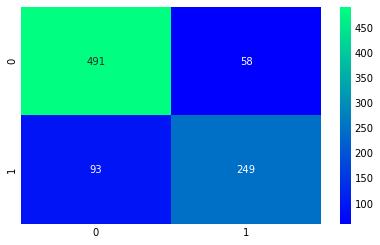

In [88]:
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance

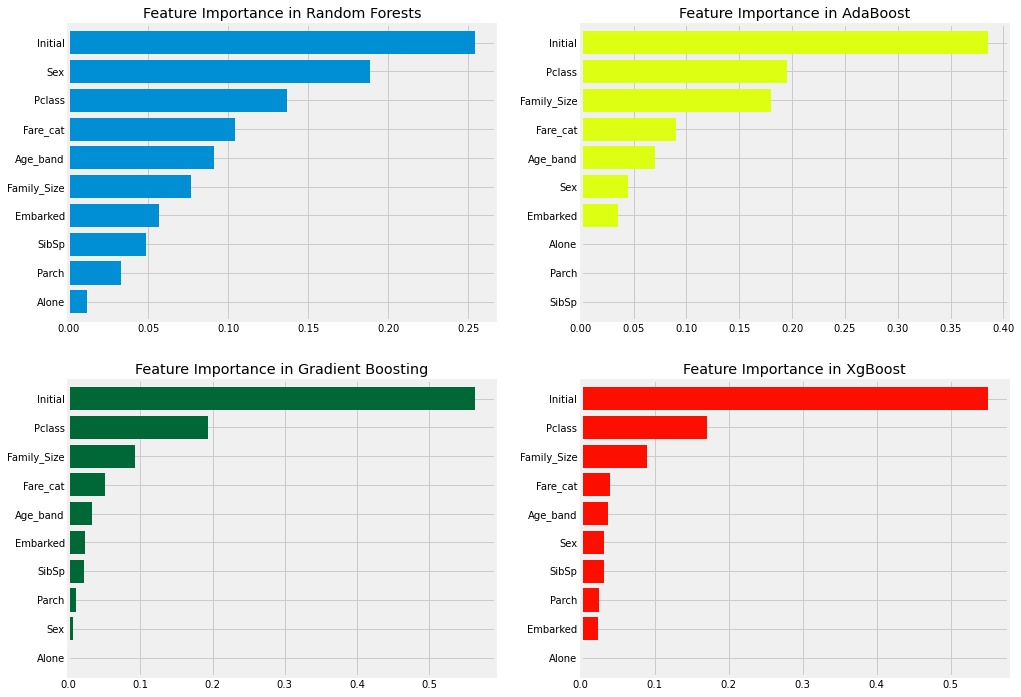

In [93]:
fig,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xgb.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()
